# Importando base de dados

In [147]:
import pandas as pd

In [148]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [149]:
dados = pd.read_csv('tips.csv')

In [150]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [151]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [152]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [153]:
type(dados)

pandas.core.frame.DataFrame

In [154]:
gorjetas = dados.rename(columns = renomear)

In [155]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [156]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [157]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [158]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [159]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [160]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [161]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [162]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [163]:
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [164]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [165]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [166]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [167]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [168]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [169]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [170]:
!pip install seaborn==0.9.0

In [171]:
import seaborn as sns

In [172]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\klayt\anaconda3\lib\site-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: pandas-profiling, missingno


# Análise 1 - Valor da conta e gorjeta

In [173]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

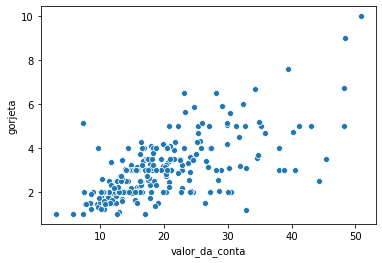

In [174]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [175]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [176]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [177]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [178]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [179]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [180]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


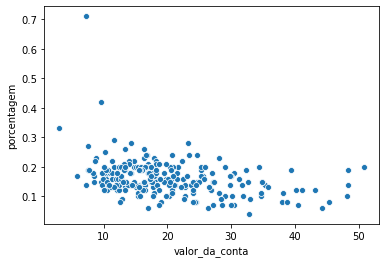

In [181]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas )

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

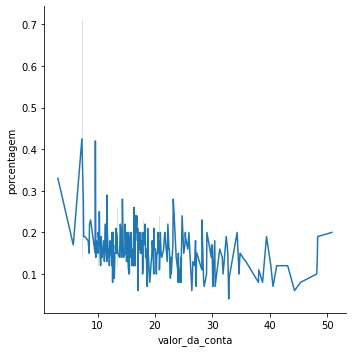

In [182]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

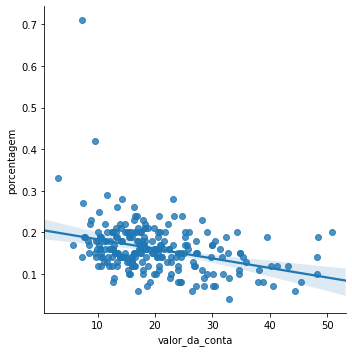

In [183]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [184]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [185]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [186]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


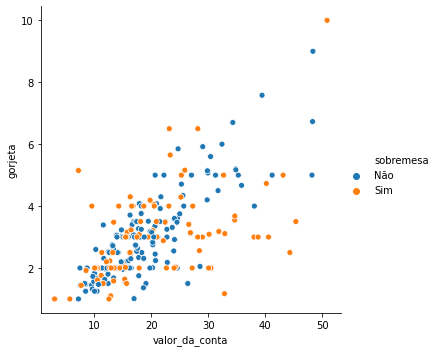

In [187]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

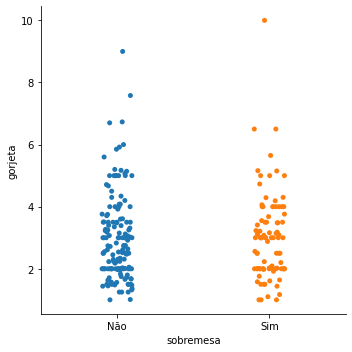

In [188]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

**Visualmente, parece que temos poucas diferenças de quem pediu a sobremesa e de quem não pediu a sobremesa**

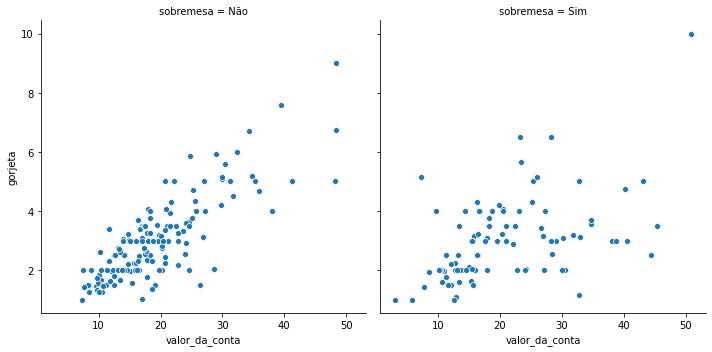

In [189]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

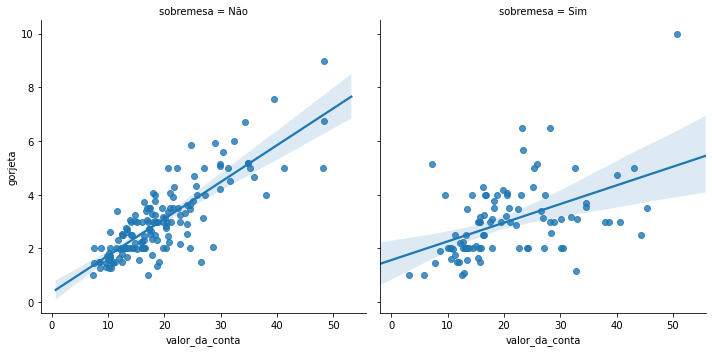

In [190]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

**Visualmente, a distribuição apresenta poucas diferenças**

# Análise 2 - Sobremesa

In [191]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [192]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [193]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


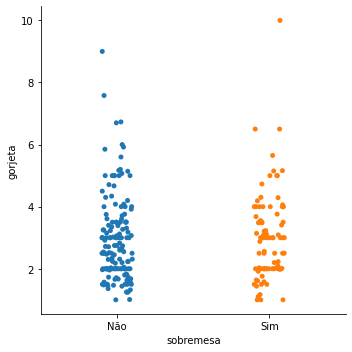

In [194]:
sns.catplot(x='sobremesa', y='gorjeta',data=gorjetas)

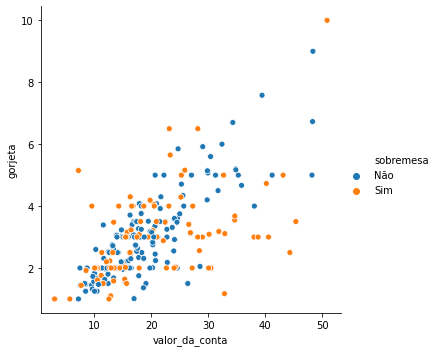

In [195]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

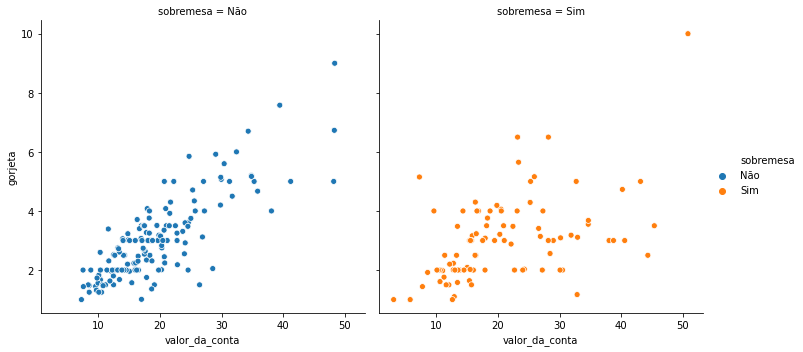

In [196]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

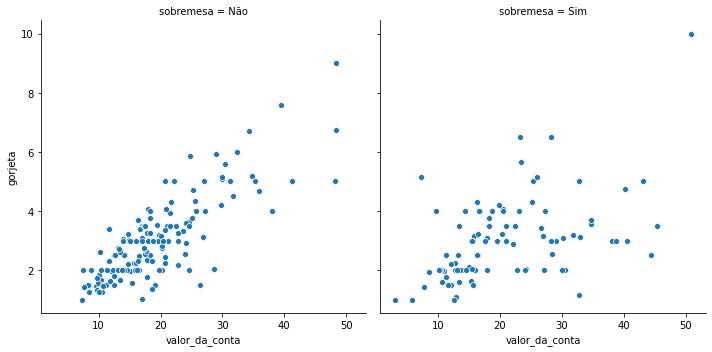

In [197]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='sobremesa', data=gorjetas)

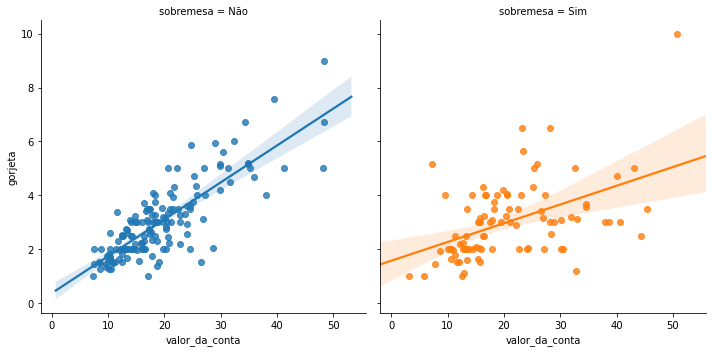

In [198]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

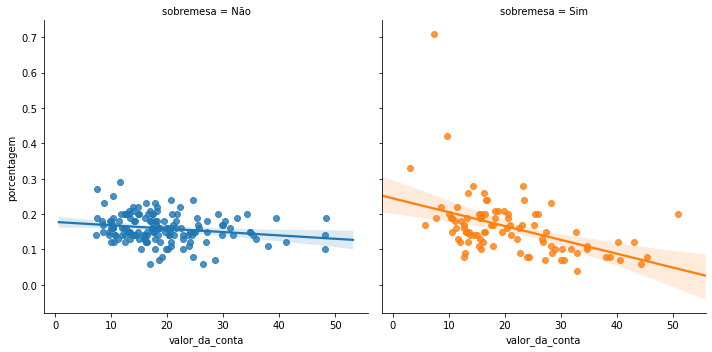

In [199]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

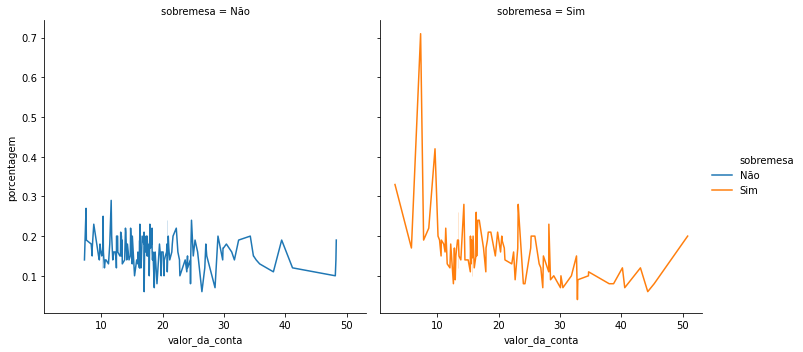

In [200]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [201]:
from scipy.stats import ranksums

In [202]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [203]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [204]:
r = ranksums(sobremesa, sem_sobremesa)

In [205]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

 ### Análise 3 Dias da semana

In [206]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [207]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

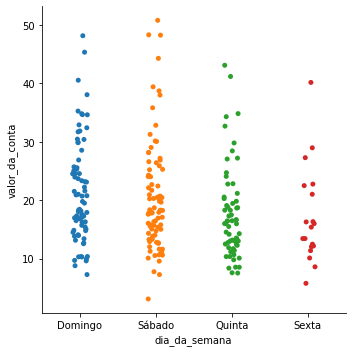

In [208]:
sns.catplot(x = "dia_da_semana", y = "valor_da_conta", data = gorjetas)

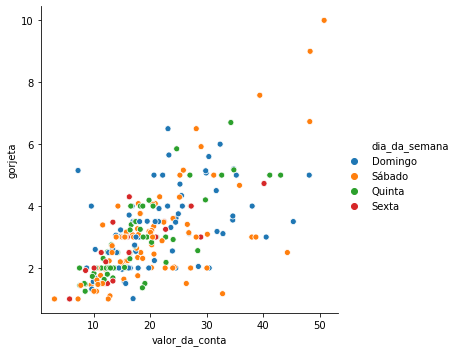

In [209]:
sns.relplot (x = "valor_da_conta", y = "gorjeta", hue = "dia_da_semana", data = gorjetas)

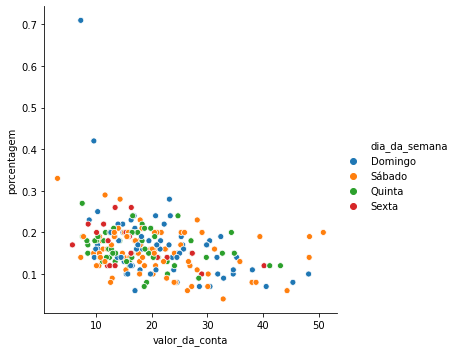

In [210]:
sns.relplot (x = "valor_da_conta", y = "porcentagem", hue = "dia_da_semana", data = gorjetas)

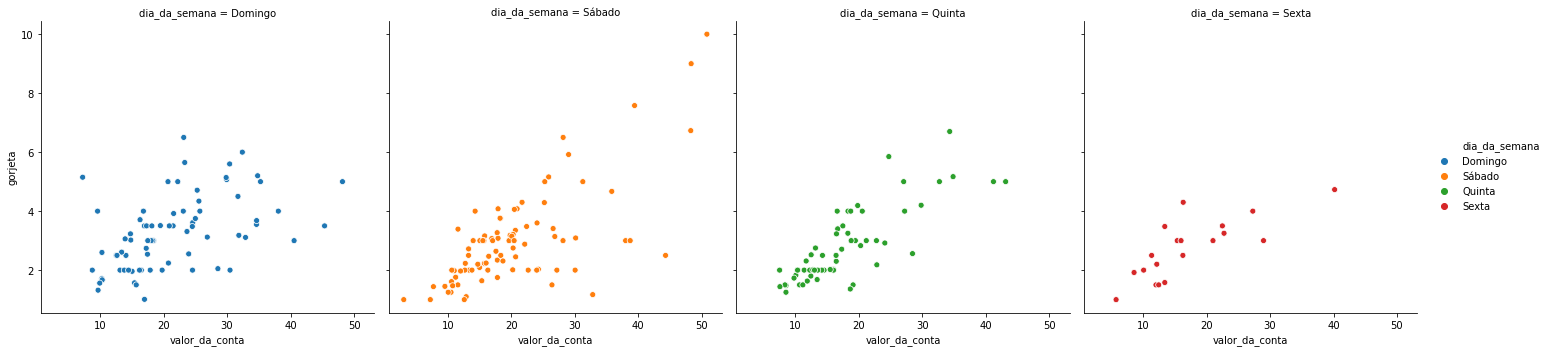

In [211]:
sns.relplot (x = "valor_da_conta", y = "gorjeta", hue = "dia_da_semana", col = "dia_da_semana", data = gorjetas)

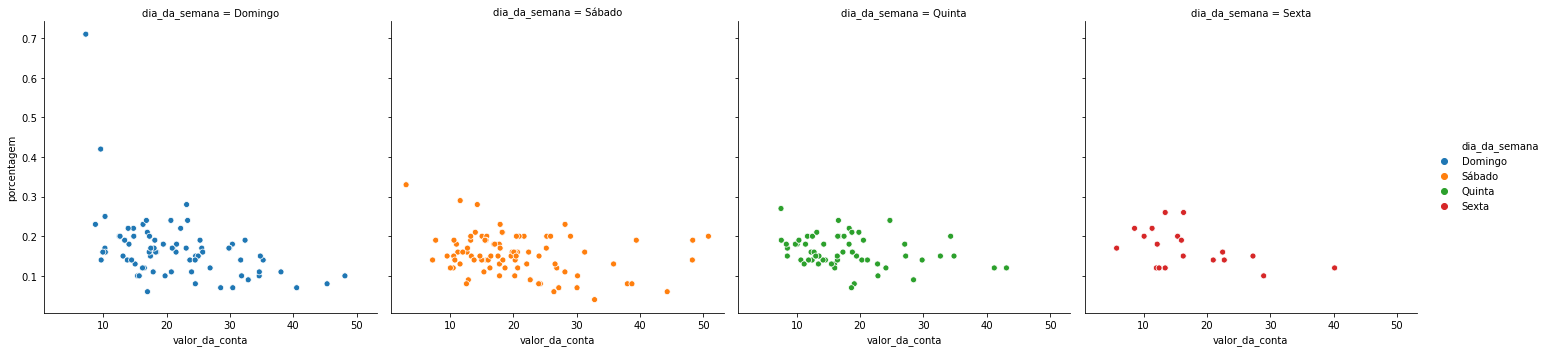

In [212]:
sns.relplot (x = "valor_da_conta", y = "porcentagem", hue = "dia_da_semana", col = "dia_da_semana", data = gorjetas)

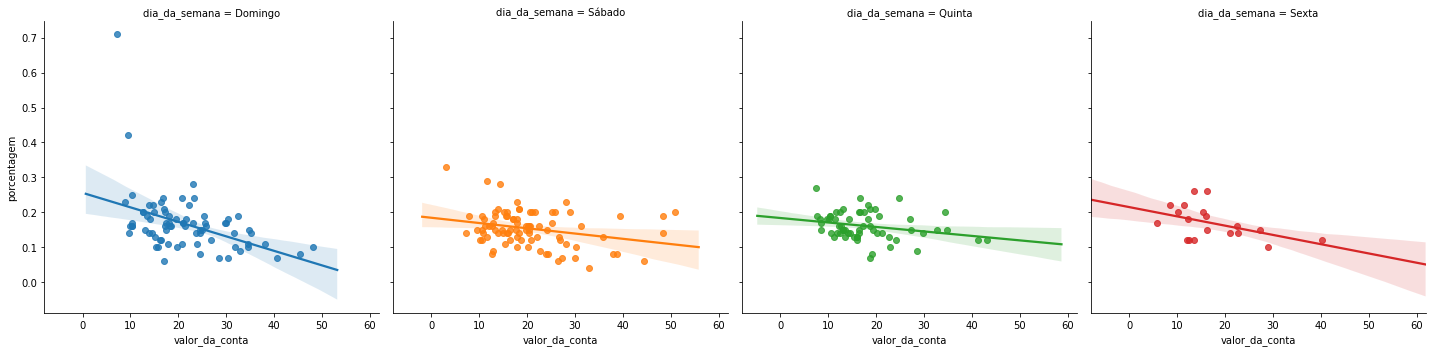

In [213]:
sns.lmplot (x = "valor_da_conta", y = "porcentagem", hue = "dia_da_semana", col = "dia_da_semana", data = gorjetas)

In [214]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print ("A média geral das gorjetas é de {} ".format(gorjetas.gorjeta.mean()))

A média geral das gorjetas é de 2.9982786885245902 


In [215]:
gorjetas.groupby(["dia_da_semana"]).mean()[["valor_da_conta", "gorjeta", "porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [216]:
print("Frequência dos dias")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de Hipótese 

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sabado e domingo**


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sabado e domingo**

In [254]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [255]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [256]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado )
print("o valor do p-value é {}".format(r2.pvalue))

o valor do p-value é 0.3576728477868443


Hnull

A distribuição do valor da conta é igual no sabado e domingo

## Análise 4 - Hora do dia

In [257]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [258]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

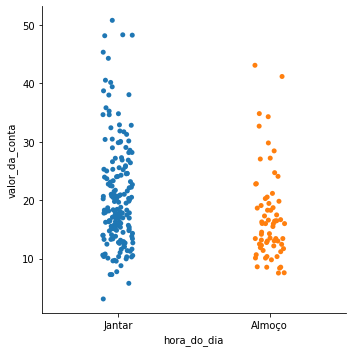

In [259]:
sns.catplot(x = "hora_do_dia", y = "valor_da_conta", data = gorjetas)

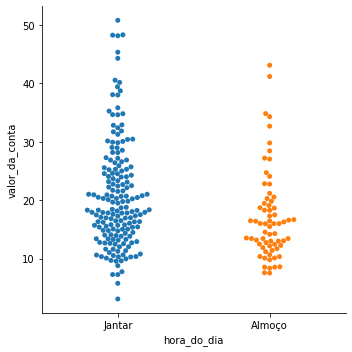

In [260]:
sns.catplot(x = "hora_do_dia", y = "valor_da_conta", kind = "swarm", data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

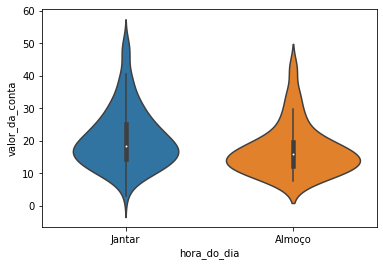

In [261]:
sns.violinplot(x = "hora_do_dia", y = "valor_da_conta", data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

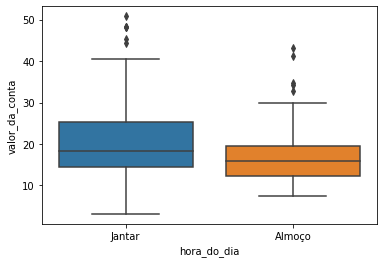

In [262]:
sns.boxplot(x = "hora_do_dia", y = "valor_da_conta", data = gorjetas)

In [263]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

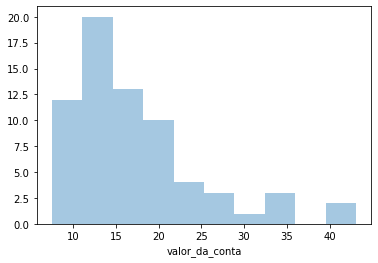

In [264]:
sns.distplot(almoco, kde = False)

<AxesSubplot:xlabel='valor_da_conta'>

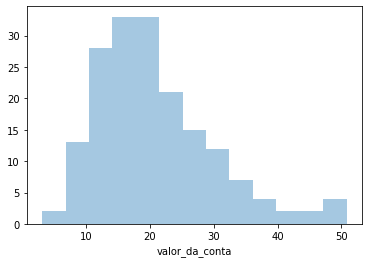

In [265]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.distplot(jantar, kde = False)

In [266]:
gorjetas.groupby(["hora_do_dia"]).mean()[["valor_da_conta", "gorjeta", "porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese 2

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar  e no almoço**



**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**


In [267]:
r3 = ranksums(jantar, almoco)

In [268]:
print("O valor do p-value é de {}".format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**


In [269]:
porcentagem_almoco = gorjetas.query("hora_do_dia =='Almoço'").porcentagem

In [270]:
porcentagem_jantar = gorjetas.query("hora_do_dia =='Jantar'").porcentagem

In [271]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

**H<sup>null</sup>**
>**A distribuição do valor da taxa da gorjeta é igual no jantar  e no almoço**

In [272]:
print("O valor do p-value é de {}".format(r4.pvalue))

O valor do p-value é de 0.2602493995587126
